<a href="https://colab.research.google.com/github/ENRIKO-18/D-DScience/blob/main/M2_P4_Pandas-R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  16.3M      0  0:00:01  0:00:01 --:--:-- 16.3M


In [ ]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   

    designation  points  price           province           region_1  \
0  Vulkà Bianco      87    NaN  Sicily & Sardinia               Etna   
1      Avidagos      87   15.0              Douro                NaN   
2           NaN      87   14.0             Oregon  Willamette Valley   

            region_2    taster_name taster_twitter_handle  \
0                NaN  Kerin O’Keefe          @kerinokeefe   
1                NaN     Roger Voss            @vossroger   
2  Willamette Valley   Paul Gregutt           @paulgwine    

                                           title         variety  \
0              Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2  Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm

In [ ]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

country                                        description   designation  \
0     Italy  Aromas include tropical fruit, broom, brimston...  Vulkà Bianco   
1  Portugal  This is ripe and fruity, a wine that is smooth...      Avidagos   
2        US  Tart and snappy, the flavors of lime flesh and...           NaN   

   points  price           province           region_1           region_2  \
0      87    NaN  Sicily & Sardinia               Etna                NaN   
1      87   15.0              Douro                NaN                NaN   
2      87   14.0             Oregon  Willamette Valley  Willamette Valley   

     taster_name taster_twitter_handle  \
0  Kerin O’Keefe          @kerinokeefe   
1     Roger Voss            @vossroger   
2   Paul Gregutt           @paulgwine    

                                           title         variety  \
0              Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2  Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm

### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [ ]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX.head(3)

country       winery             variety  \
0  Mexico   L.A. Cetto            Nebbiolo   
1  Mexico  Monte Xanic     Sauvignon Blanc   
2  Mexico   L.A. Cetto  Cabernet Sauvignon   

                                         description  points  price  
0  The color is appropriately light, the aromas a...      88   18.0  
1  Sauvignon Blanc is, in general, one of Baja's ...      87   15.0  
2  Aromas of mature Cabernet: cassis, tobacco lea...      87   18.0

### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

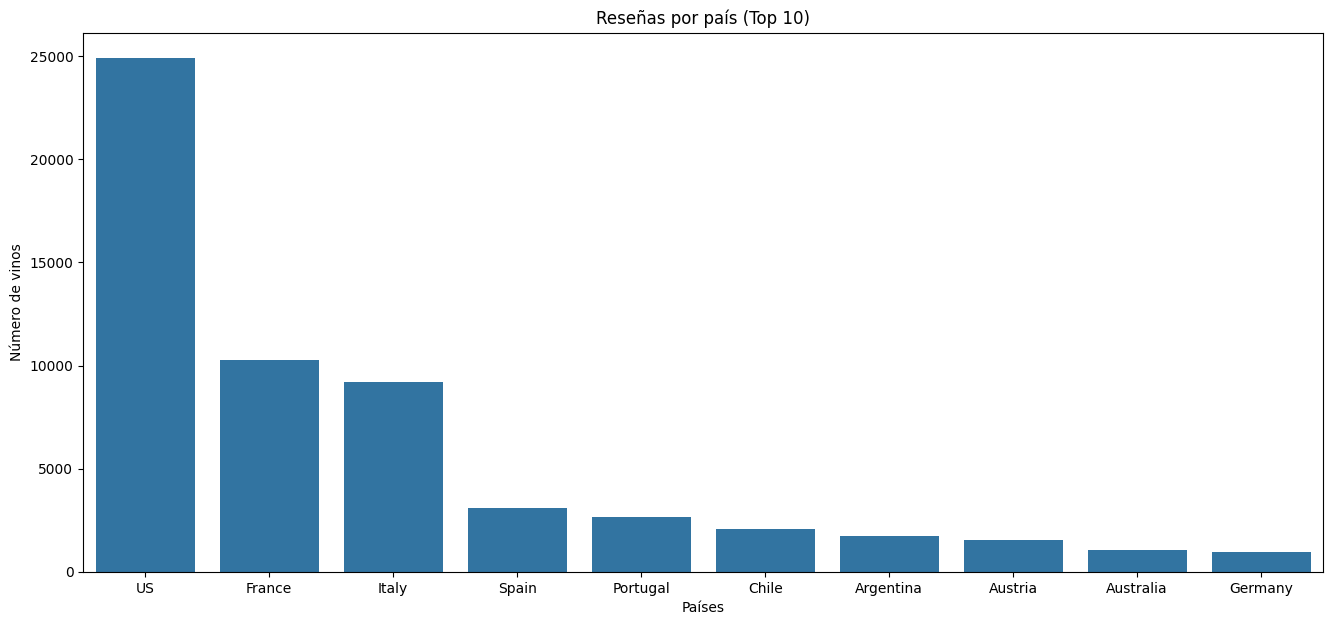

In [ ]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

plt.figure(figsize=(16,7))
sns.barplot(x=x[:10], y=y[:10])

# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

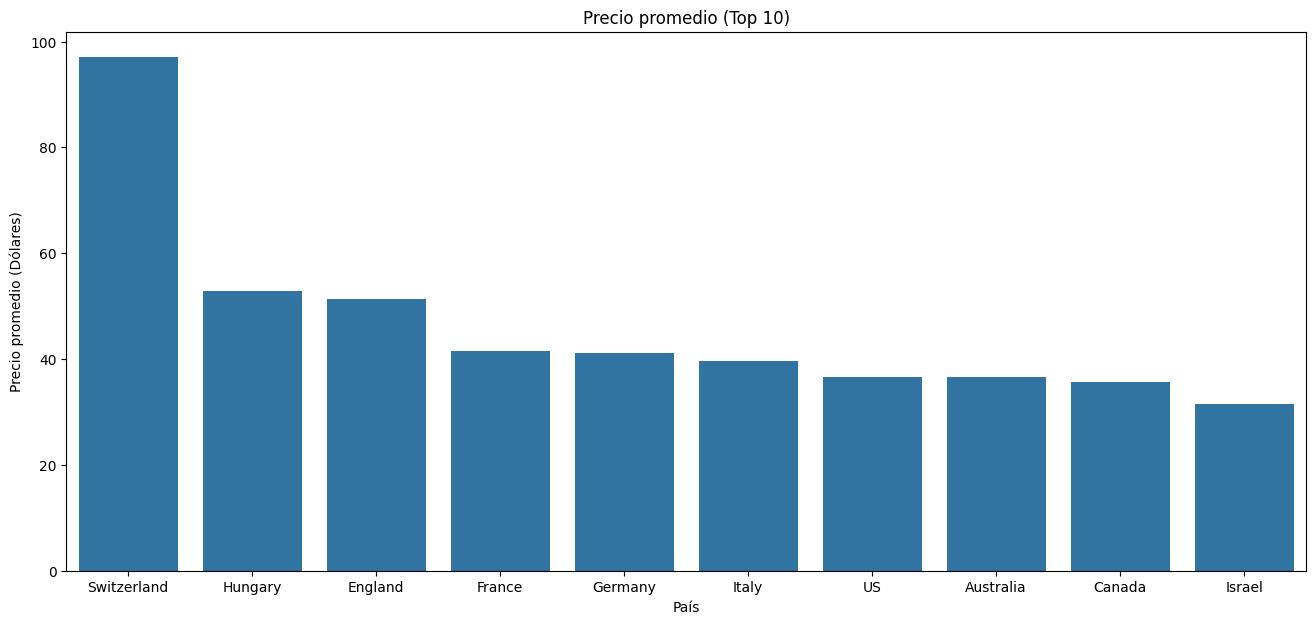

In [33]:
"""
SECUENCIA:
1. Agrupar los datos por país (groupby)
2. Generar una nueva serie "promedios", cuyo índice sea el nombre del páis, y el valor sea el promedio de precios.
3. Ordenar de manera descendente los datos.
4. Generar el gráfico de los top 10 con Seaborn.
"""
promedios = df.groupby('country')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,7))
x = promedios.index[:10]
y = promedios.values[:10]
sns.barplot(x=x, y=y)

plt.xlabel("País")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")

plt.show()

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

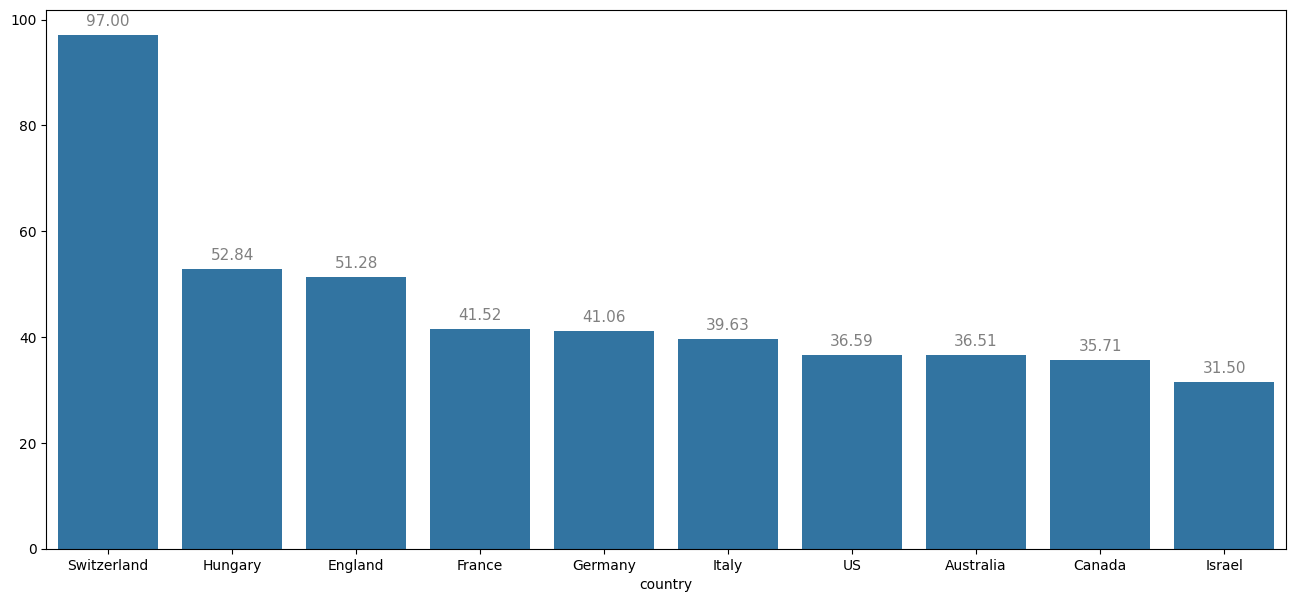

In [31]:
#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x=x, y=y)

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

<ipython-input-43-93150d125277>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['razon']=df_limpio['points']/df_limpio['price']


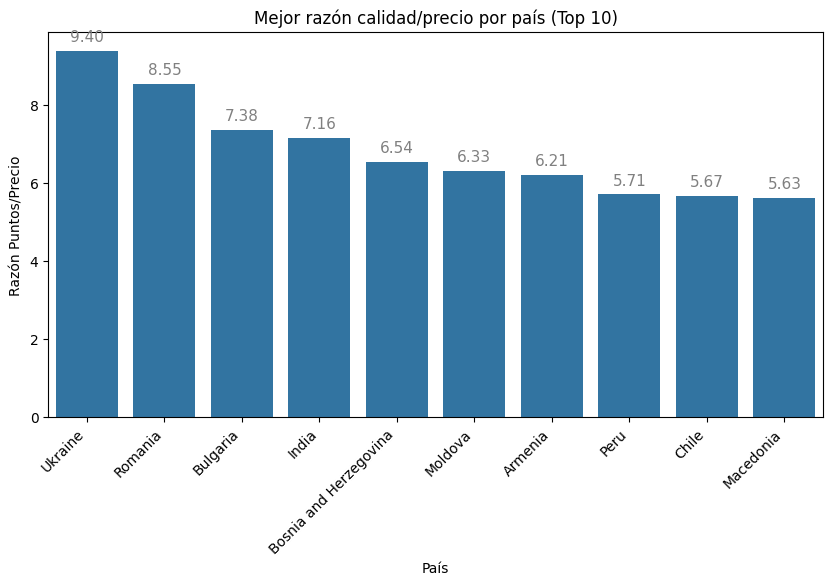

In [43]:
"""
SECUENCIA:
1.Generar un copia del dataframe eliminando aquellos datos con Nan o ceros en la columna price o points.
2. Agrupar los datos por país utilizando groupby.
3. Generar una nueva serie "razon", cuyo índice sea el nombre del páis, y el valor sea la división entre el promedio de puntos y el promedio de precios.
4. Ordenar de manera descendente los datos.
5. Generar el gráfico de los top 10 con Seaborn.
6. Agregar anotaciones al gráfico.
"""
plt.figure(figsize=(10,5))

### TU CODIGO AQUI ##
df_limpio = df.dropna(subset=['price','points'], how='any')
df_limpio['puntos/precio']=df_limpio['points']/df_limpio['price']
razon_mean = df_limpio.groupby('country')['puntos/precio'].mean().sort_values(ascending=False)
x = razon_mean.index[:10]
y = razon_mean.values[:10]
ax = sns.barplot(x=x, y=y)

#####################

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()

### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

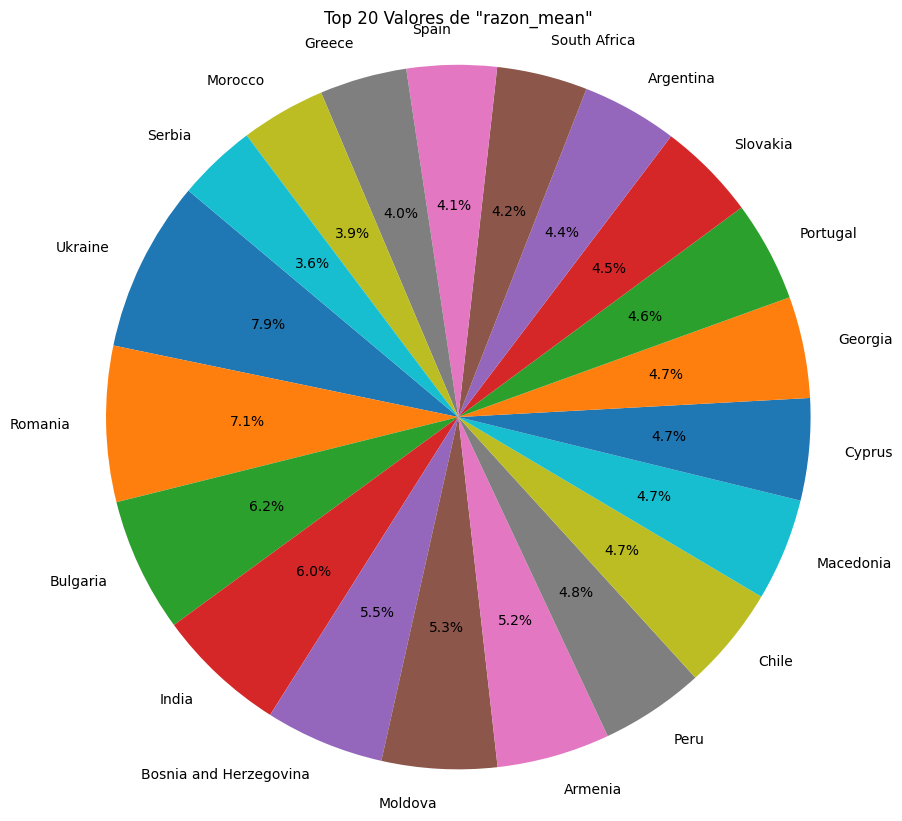

In [47]:
#TU CODIGO

plt.figure(figsize=(10, 10))  # Ajustar el tamaño de la figura si es necesario
plt.pie(razon_mean[0:20].values, labels=razon_mean[0:20].index, autopct='%1.1f%%', startangle=140)
plt.title('Top 20 Valores de "razon_mean"')
plt.axis('equal')  # Aspecto igual para que el pastel sea un círculo
plt.show()

### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [66]:
#TU CODIGO
top_var=df['variety'].value_counts()[:10]
top_var

variety
Pinot Noir                  6096
Chardonnay                  5343
Cabernet Sauvignon          4353
Red Blend                   4179
Bordeaux-style Red Blend    3164
Riesling                    2406
Sauvignon Blanc             2344
Syrah                       1900
Rosé                        1590
Merlot                      1412
Name: count, dtype: int64

### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [62]:
#TU CODIGO
bodegas = (df['winery'].value_counts()[:20]/df['winery'].value_counts()[:20].sum())*100
bodegas

winery
Georges Duboeuf               7.496561
Wines & Winemakers            7.359010
Testarossa                    6.671252
Louis Latour                  5.983494
DFJ Vinhos                    5.914718
Williams Selyem               5.914718
Chateau Ste. Michelle         5.914718
Concha y Toro                 5.364512
Gary Farrell                  5.089409
Lynmar                        4.951857
Kendall-Jackson               4.676754
Robert Mondavi                4.470426
Trapiche                      3.920220
Columbia Crest                3.920220
Undurraga                     3.851444
Albert Bichot                 3.782669
Siduri                        3.782669
Rodney Strong                 3.645117
Jean-Luc and Paul Aegerter    3.645117
Casa Santos Lima              3.645117
Name: count, dtype: float64

### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).


# <font color="red">Para este ejercicio ya no me quedó claro si debíamos tomar todos los datos, o solo el de los 10 paices con el los valores mas altos de "Value" o los de valor mas alto "puntos/precio"</font>, de modo que generé otro data frame p_v_top a partir de p_v_ordenado considerando la relación "puntos/precio", de modo que fuera mas viable la visualización de los gráficos, y no los 41 paices.

In [118]:
#TU CODIGO
p_v = df_limpio[['country', 'variety', 'winery', 'points', 'price','puntos/precio']]
#Modificación de winery
p_v.loc[:, 'winery'] = p_v['country'] + '-' + p_v['winery']
p_v.head(5)

country             variety                        winery  points  price  \
1  Portugal      Portuguese Red  Portugal-Quinta dos Avidagos      87   15.0   
2        US          Pinot Gris                  US-Rainstorm      87   14.0   
3        US            Riesling                 US-St. Julian      87   13.0   
4        US          Pinot Noir               US-Sweet Cheeks      87   65.0   
5     Spain  Tempranillo-Merlot                  Spain-Tandem      87   15.0   

   puntos/precio  
1       5.800000  
2       6.214286  
3       6.692308  
4       1.338462  
5       5.800000

Versión con todos los datos

In [124]:
#Ordena los datos por nombre de país, variedad y bodega (orden ascendente).
p_v_ordenado = p_v.sort_values(by=['country', 'variety', 'winery'], ascending=[True, True, True])
p_v_ordenado = p_v_ordenado.reset_index(drop=True)
p_v_ordenado.head(20)

country  variety                         winery  points  price  \
0   Argentina  Barbera  Argentina-Altos de San Isidro      85   18.0   
1   Argentina  Bonarda     Argentina-Aguijón De Abeja      85   16.0   
2   Argentina  Bonarda         Argentina-Alfredo Roca      86   21.0   
3   Argentina  Bonarda         Argentina-Alma del Sur      87   10.0   
4   Argentina  Bonarda         Argentina-Alma del Sur      89   10.0   
5   Argentina  Bonarda   Argentina-Altos Las Hormigas      89   10.0   
6   Argentina  Bonarda           Argentina-Andean Sky      85   10.0   
7   Argentina  Bonarda              Argentina-Argento      88   14.0   
8   Argentina  Bonarda              Argentina-Argento      87   13.0   
9   Argentina  Bonarda                Argentina-Argie      89   17.0   
10  Argentina  Bonarda            Argentina-Caligiore      85   15.0   
11  Argentina  Bonarda              Argentina-Chakana      84   11.0   
12  Argentina  Bonarda            Argentina-Cruz Alta      87   15.0   
13  Argentina  Bonarda       Argentina-Dolce Stefania      90   10.0   
14  Argentina  Bonarda            Argentina-Durigutti      85   15.0   
15  Argentina  Bonarda            Argentina-Durigutti      87   25.0   
16  Argentina  Bonarda            Argentina-Durigutti      87   11.0   
17  Argentina  Bonarda           Argentina-El Enemigo      91   30.0   
18  Argentina  Bonarda           Argentina-El Enemigo      88   28.0   
19  Argentina  Bonarda           Argentina-El Enemigo      89   20.0   

    puntos/precio  
0        4.722222  
1        5.312500  
2        4.095238  
3        8.700000  
4        8.900000  
5        8.900000  
6        8.500000  
7        6.285714  
8        6.692308  
9        5.235294  
10       5.666667  
11       7.636364  
12       5.800000  
13       9.000000  
14       5.666667  
15       3.480000  
16       7.909091  
17       3.033333  
18       3.142857  
19       4.450000

Versión con top 10 paices

In [149]:
#tomo como ref. de filtro el top 10 en "razon_mean" que tiene los promedios de "puntos/precio" para crear p_v_top
p_v_top=p_v[p_v['country'].isin(razon_mean[:10].index)]
#Ordena los datos por nombre de país, variedad y bodega (orden ascendente).
p_v_top = p_v_top.sort_values(by=['country', 'variety', 'winery'], ascending=[True, True, True])
p_v_top  = p_v_top.reset_index(drop=True) #Reset de Index
p_v_top .head(20)

country                   variety  \
0                  Armenia                   Kangoun   
1   Bosnia and Herzegovina                    Vranec   
2                 Bulgaria  Bordeaux-style Red Blend   
3                 Bulgaria            Cabernet Franc   
4                 Bulgaria        Cabernet Sauvignon   
5                 Bulgaria        Cabernet Sauvignon   
6                 Bulgaria        Cabernet Sauvignon   
7                 Bulgaria        Cabernet Sauvignon   
8                 Bulgaria        Cabernet Sauvignon   
9                 Bulgaria        Cabernet Sauvignon   
10                Bulgaria        Cabernet Sauvignon   
11                Bulgaria        Cabernet Sauvignon   
12                Bulgaria        Cabernet Sauvignon   
13                Bulgaria        Cabernet Sauvignon   
14                Bulgaria        Cabernet Sauvignon   
15                Bulgaria        Cabernet Sauvignon   
16                Bulgaria        Cabernet Sauvignon   
17                Bulgaria  Cabernet Sauvignon-Syrah   
18                Bulgaria                Chardonnay   
19                Bulgaria                Chardonnay   

                                  winery  points  price  puntos/precio  
0                       Armenia-Van Ardi      87   14.0       6.214286  
1   Bosnia and Herzegovina-Winery Čitluk      85   13.0       6.538462  
2                  Bulgaria-Castra Rubra      91   30.0       3.033333  
3               Bulgaria-Minkov Brothers      87   22.0       3.954545  
4                    Bulgaria-Bulgariana      90   11.0       8.181818  
5             Bulgaria-Chateau Burgozone      89   14.0       6.357143  
6             Bulgaria-Chateau Burgozone      90   14.0       6.428571  
7                 Bulgaria-Domaine Boyar      87    9.0       9.666667  
8                 Bulgaria-Domaine Boyar      87    9.0       9.666667  
9                     Bulgaria-K Cellars      90   11.0       8.181818  
10                    Bulgaria-Katarzyna      89   15.0       5.933333  
11                    Bulgaria-Manastira      86   13.0       6.615385  
12             Bulgaria-Vinex Slavyantsi      84   10.0       8.400000  
13                         Bulgaria-Vini      87    8.0      10.875000  
14                         Bulgaria-Vini      87    9.0       9.666667  
15                         Bulgaria-Vini      86    9.0       9.555556  
16                         Bulgaria-Vini      85    9.0       9.444444  
17                   Bulgaria-Bulgariana      90   14.0       6.428571  
18            Bulgaria-Chateau Burgozone      90   14.0       6.428571  
19            Bulgaria-Chateau Burgozone      91   23.0       3.956522

In [148]:
#Prueba para ver si se eliminaron aquellos valores que no estuvieran dentro del top 10
"Argentina" in p_v_top["country"].values

False

#### &#9758; Observa la relación puntos-precio por país

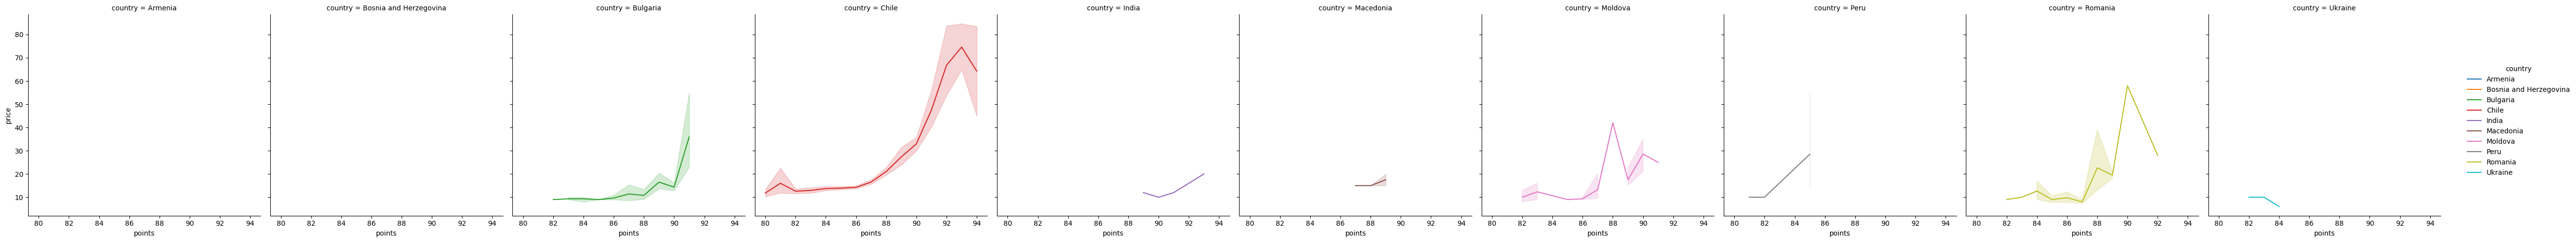

In [150]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v_top)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

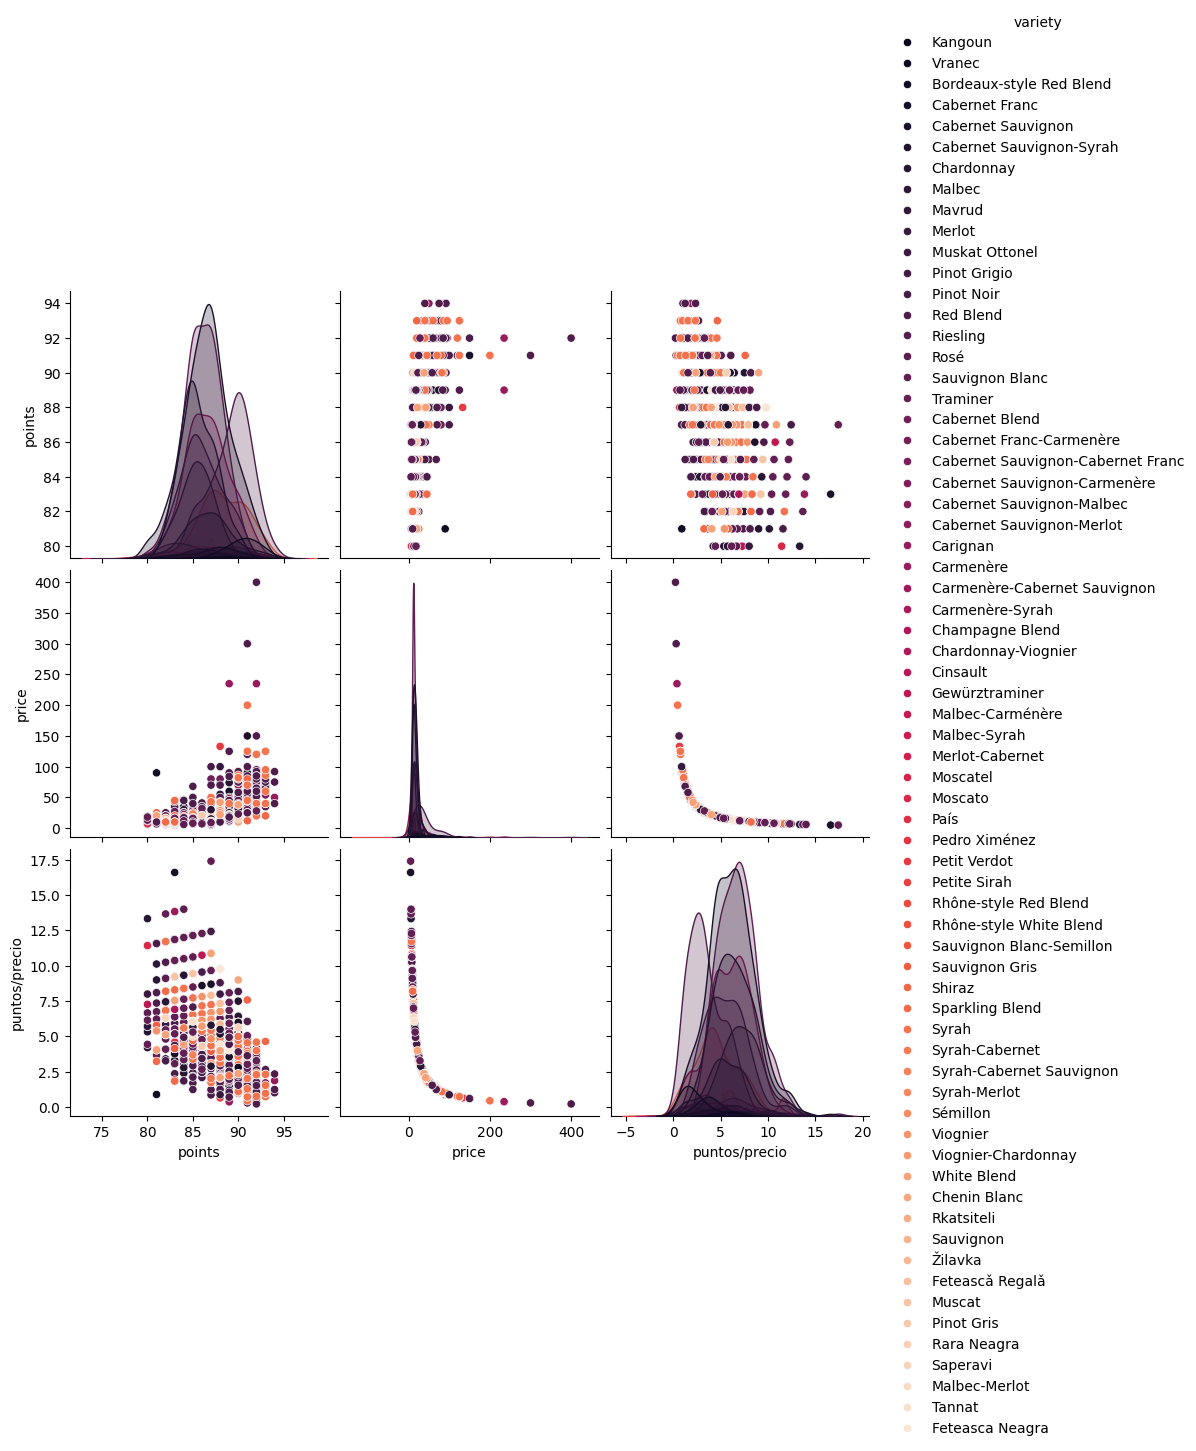

In [151]:
sns.pairplot(p_v_top, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

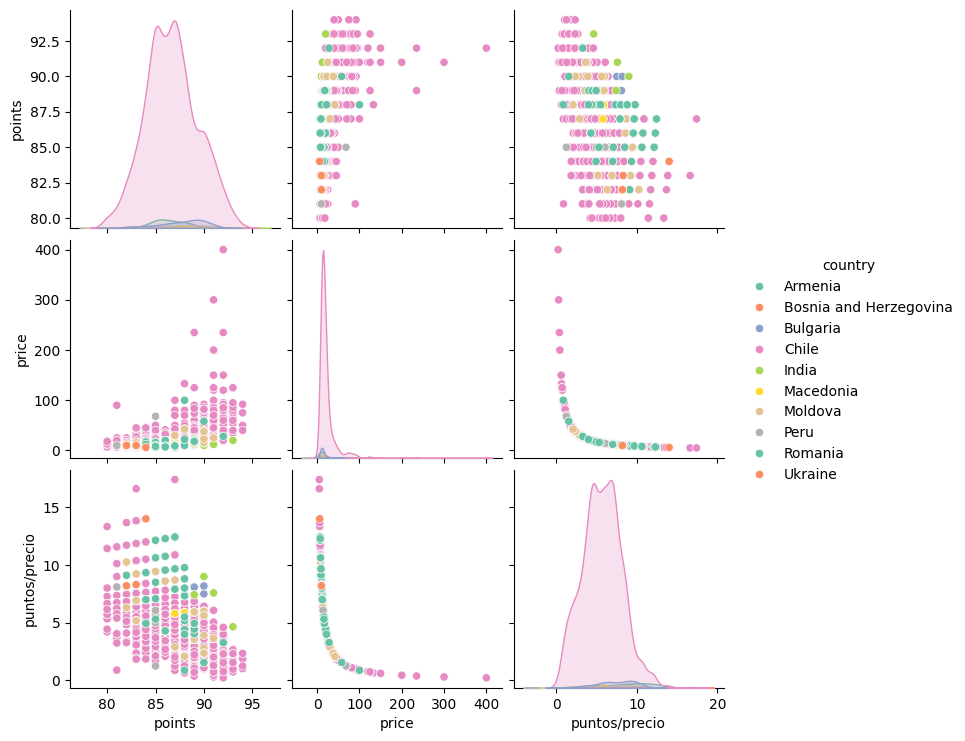

In [152]:
#TU CODIGO
sns.pairplot(p_v_top, hue="country", height=2.5, palette="Set2")

#### &#9758; Observa las distribuciones por pares en función de la bodega.

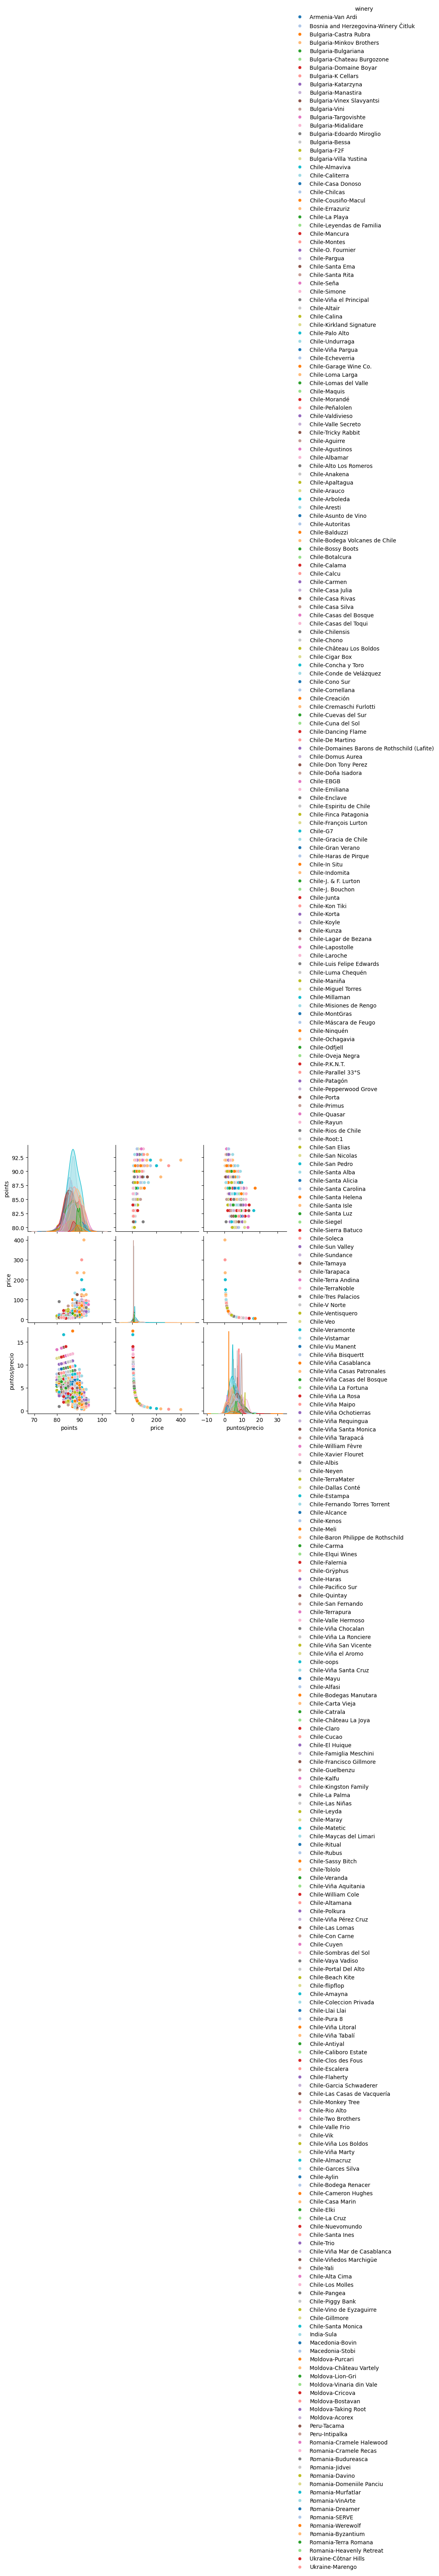

In [153]:
#TU CODIGO
sns.pairplot(p_v_top, hue="winery", height=2.5, palette="tab20")

#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

<ipython-input-155-37be88e46e6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=p_v_top, x="variety", y="price", jitter=True, palette="Set2")


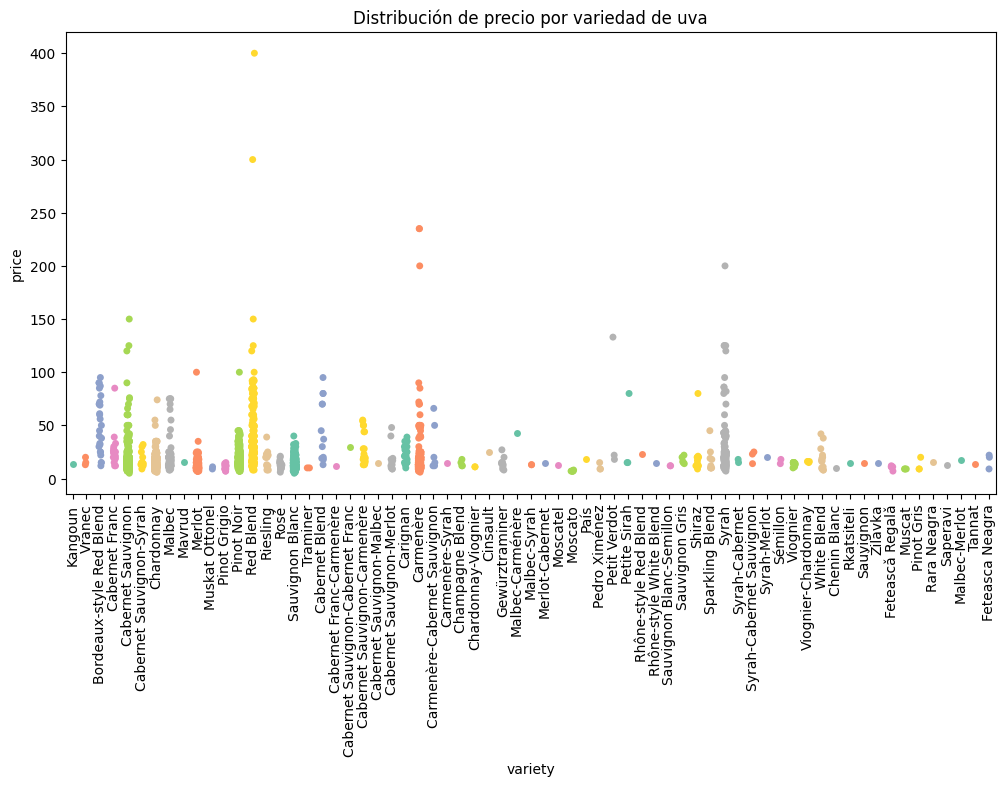

In [155]:
#TU CODIGO
plt.figure(figsize=(12, 6))
sns.stripplot(data=p_v_top, x="variety", y="price", jitter=True, palette="Set2")
plt.xticks(rotation=90)
plt.title("Distribución de precio por variedad de uva")
plt.show()

#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

<ipython-input-158-3fb594275fbb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_win, x="winery", y="price", jitter=True, palette="Set2")


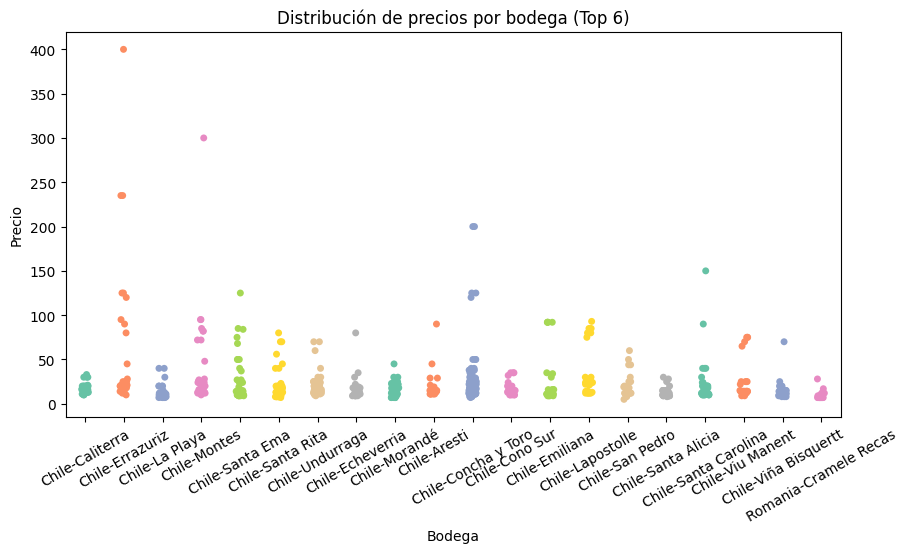

In [158]:
#TU CODIGO

# Seleccionamos las bodegas con más registros
top_wineries = p_v_top["winery"].value_counts().head(20).index
df_win = p_v_top[p_v_top["winery"].isin(top_wineries)]

# Gráfico de dispersión (stripplot)
plt.figure(figsize=(10, 5))
sns.stripplot(data=df_win, x="winery", y="price", jitter=True, palette="Set2")
plt.xticks(rotation=30)
plt.title("Distribución de precios por bodega (Top 6)")
plt.ylabel("Precio")
plt.xlabel("Bodega")
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

<ipython-input-159-5128add901fc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_win, x="winery", y="puntos/precio", jitter=True, palette="Set1")


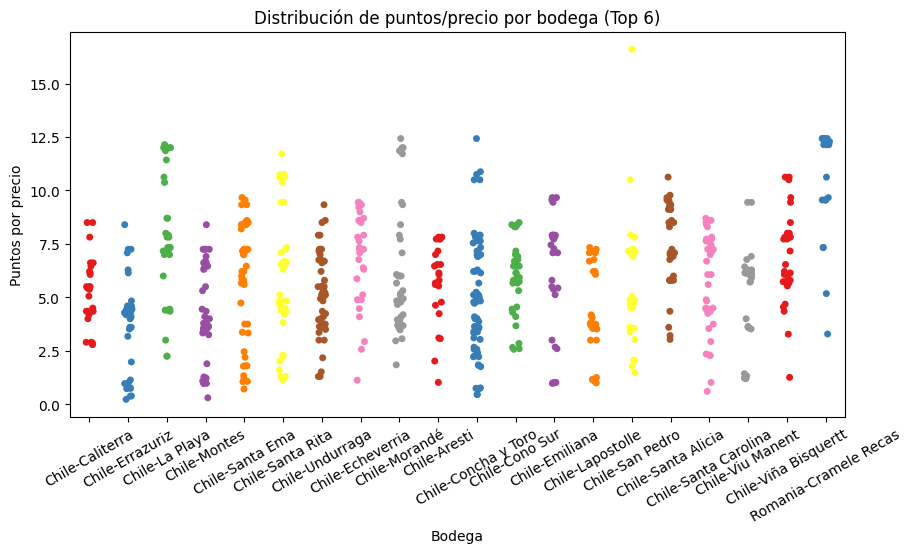

In [159]:
#TU CODIGO
# Seleccionamos las  bodegas con más registros
top_wineries = p_v_top["winery"].value_counts().head(20).index
df_win = p_v_top[p_v_top["winery"].isin(top_wineries)]

# Gráfico de dispersión (stripplot)
plt.figure(figsize=(10, 5))
sns.stripplot(data=df_win, x="winery", y="puntos/precio", jitter=True, palette="Set1")
plt.xticks(rotation=30)
plt.title("Distribución de puntos/precio por bodega (Top 6)")
plt.ylabel("Puntos por precio")
plt.xlabel("Bodega")
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

<ipython-input-166-756990fa12ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=p_v_top, x="country", y="puntos/precio", jitter=True, palette="Set2")


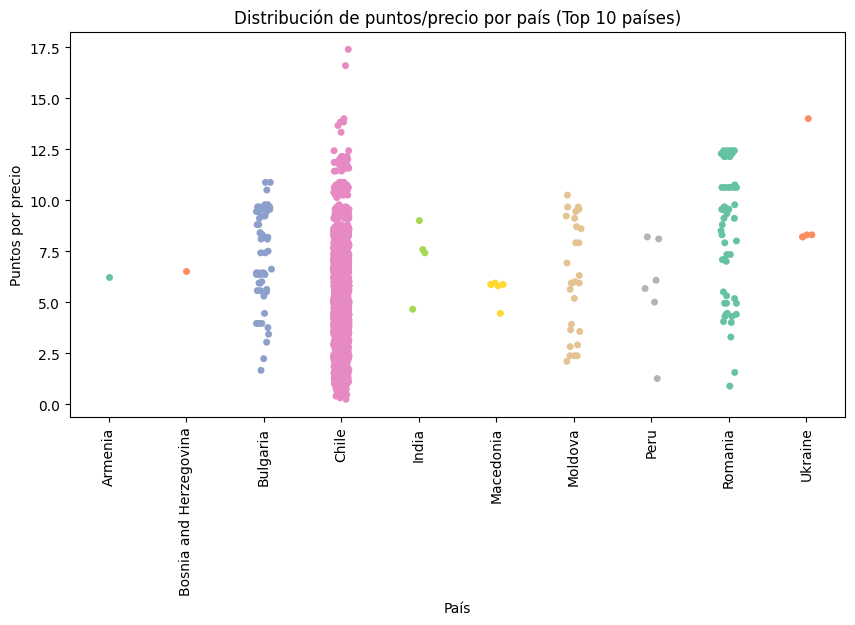

In [166]:
#TU CODIGO
plt.figure(figsize=(10, 5))
sns.stripplot(data=p_v_top, x="country", y="puntos/precio", jitter=True, palette="Set2")
plt.xticks(rotation=90)
plt.title("Distribución de puntos/precio por país (Top 10 países)")
plt.ylabel("Puntos por precio")
plt.xlabel("País")
plt.show()

### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [224]:
#TU CODIGO
vinosMX2 = vinosMX.drop(columns=["description"])
vinosMX2 .loc[:, 'winery'] = vinosMX2['country'] + '-' + vinosMX2['winery'] #Agrego el nombre del pais a "winery"
vinosMX2.head(3)

country              winery             variety  points  price
0  Mexico   Mexico-L.A. Cetto            Nebbiolo      88   18.0
1  Mexico  Mexico-Monte Xanic     Sauvignon Blanc      87   15.0
2  Mexico   Mexico-L.A. Cetto  Cabernet Sauvignon      87   18.0

In [225]:
df3 = pd.concat([p_v_top, vinosMX2], ignore_index=True)
df3.tail(3)

country                       variety                     winery  points  \
2230  Mexico  Sauvignon Blanc-Chenin Blanc  Mexico-Hacienda La Lomita      86   
2231  Mexico      Bordeaux-style Red Blend           Mexico-La Lomita      88   
2232  Mexico     Cabernet Sauvignon-Merlot         Mexico-Monte Xanic      86   

      price  puntos/precio  
2230   22.0            NaN  
2231   40.0            NaN  
2232   23.0            NaN

In [175]:
#Prueba para ver si se se agregó México
"Mexico" in df3["country"].values

True

#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [227]:
# TU CODIGO
df3["points/price"] = df3.apply(lambda fila: fila["points"] / fila["price"] if fila["price"] > 0 else None, axis=1)
df3.drop(columns=[df3.columns[5]],inplace=True)
df3.tail(10)

country                       variety                      winery  \
2223  Mexico                      Nebbiolo           Mexico-L.A. Cetto   
2224  Mexico                      Nebbiolo           Mexico-L.A. Cetto   
2225  Mexico                     Red Blend  Mexico-Rincón de Guadalupe   
2226  Mexico            Cabernet Sauvignon            Mexico-Vena Cava   
2227  Mexico                     Red Blend          Mexico-Tres Valles   
2228  Mexico                     Red Blend       Mexico-Viñas de Garza   
2229  Mexico                    Chardonnay           Mexico-L.A. Cetto   
2230  Mexico  Sauvignon Blanc-Chenin Blanc   Mexico-Hacienda La Lomita   
2231  Mexico      Bordeaux-style Red Blend            Mexico-La Lomita   
2232  Mexico     Cabernet Sauvignon-Merlot          Mexico-Monte Xanic   

      points  price  points/price  
2223      85   23.0      3.695652  
2224      88   20.0      4.400000  
2225      88   26.0      3.384615  
2226      83   27.0      3.074074  
2227      89   31.0      2.870968  
2228      92   54.0      1.703704  
2229      84   10.0      8.400000  
2230      86   22.0      3.909091  
2231      88   40.0      2.200000  
2232      86   23.0      3.739130

#### &#9758; Observa la relación puntos-precio por país

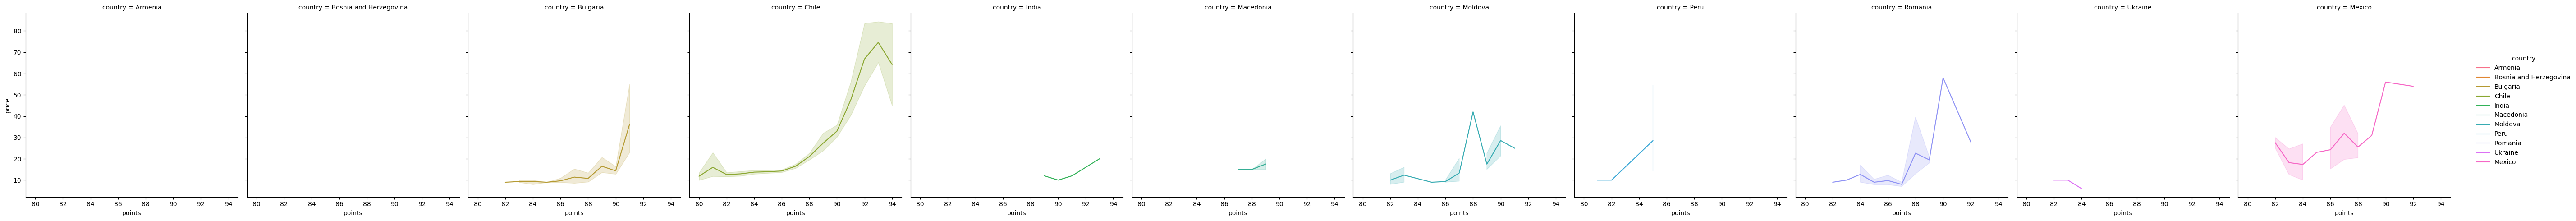

In [228]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)


#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

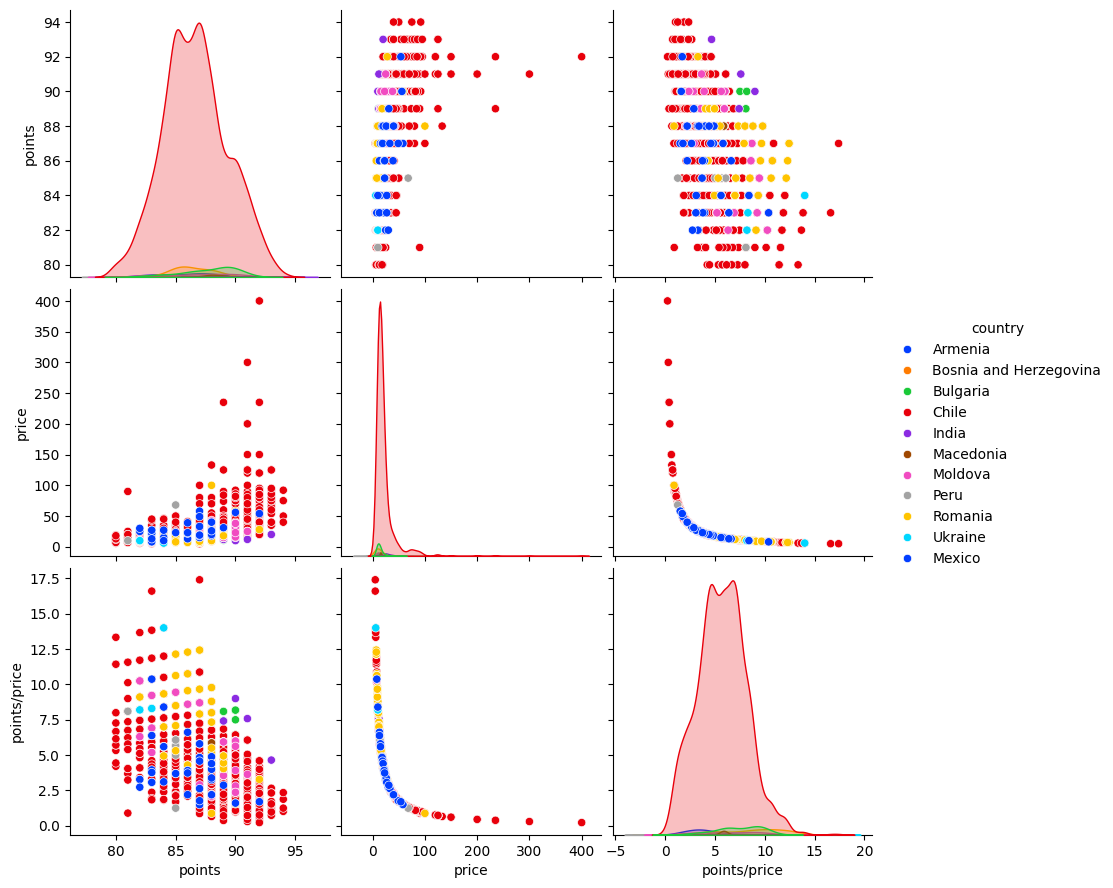

In [198]:
#mx_top = ya están agreegados al final de df3
sns.pairplot(df3, hue="country",height=3,palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

<ipython-input-199-a75306f8387d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Armenia'),
  Text(1, 0, 'Bosnia and Herzegovina'),
  Text(2, 0, 'Bulgaria'),
  Text(3, 0, 'Chile'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Macedonia'),
  Text(6, 0, 'Moldova'),
  Text(7, 0, 'Peru'),
  Text(8, 0, 'Romania'),
  Text(9, 0, 'Ukraine'),
  Text(10, 0, 'Mexico')])

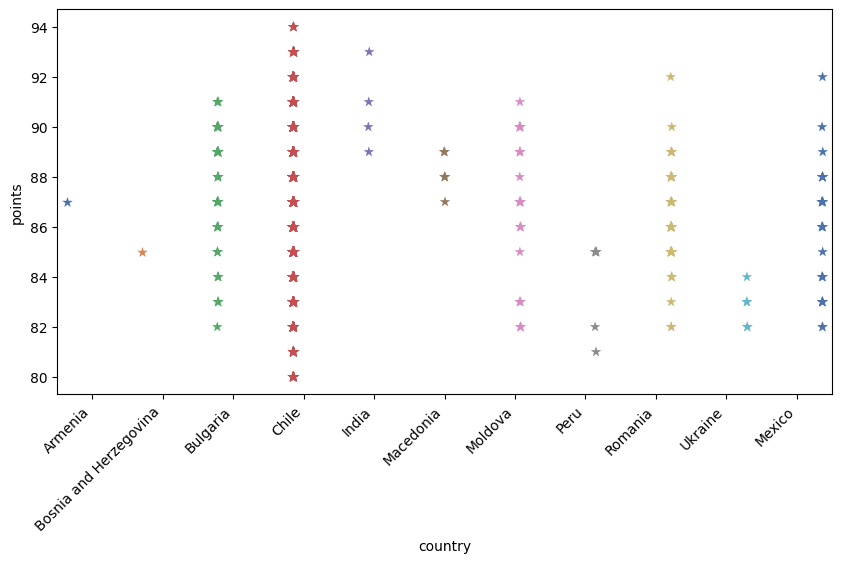

In [199]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

<ipython-input-201-ff542822bf11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)


KeyboardInterrupt: 

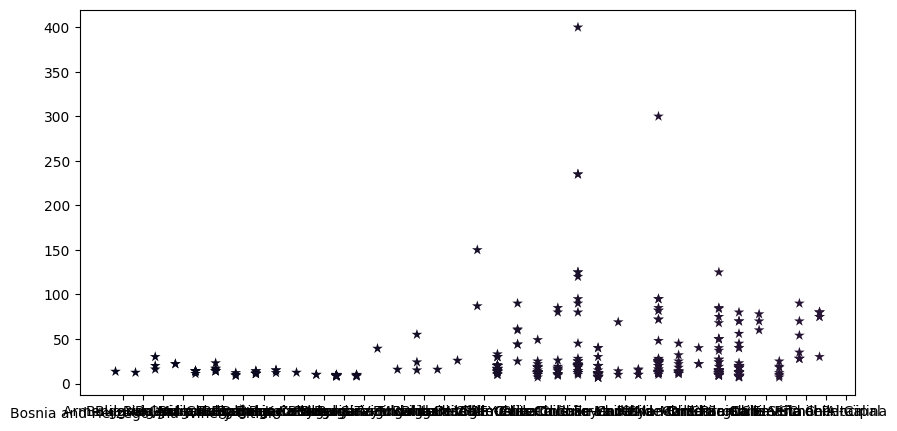

In [201]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 90, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

In [209]:
medias = df3["points/price"].mean()
promedios_por_bodega = df3.groupby(["country", "winery"])["points/price"].mean().reset_index()
promedios_por_bodega

country                                winery  \
0                   Armenia                      Armenia-Van Ardi   
1    Bosnia and Herzegovina  Bosnia and Herzegovina-Winery Čitluk   
2                  Bulgaria                        Bulgaria-Bessa   
3                  Bulgaria                   Bulgaria-Bulgariana   
4                  Bulgaria                 Bulgaria-Castra Rubra   
..                      ...                                   ...   
319                 Romania                  Romania-Terra Romana   
320                 Romania                       Romania-VinArte   
321                 Romania                      Romania-Werewolf   
322                 Ukraine                  Ukraine-Côtnar Hills   
323                 Ukraine                       Ukraine-Marengo   

     points/price  
0        6.214286  
1        6.538462  
2        3.801515  
3        6.685065  
4        4.348611  
..            ...  
319      4.941176  
320      4.120000  
321      9.555556  
322     14.000000  
323      8.250000  

[324 rows x 3 columns]

<ipython-input-229-77e31ddb6c68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df3, x="winery", y="points/price", jitter=True, palette="Set2")


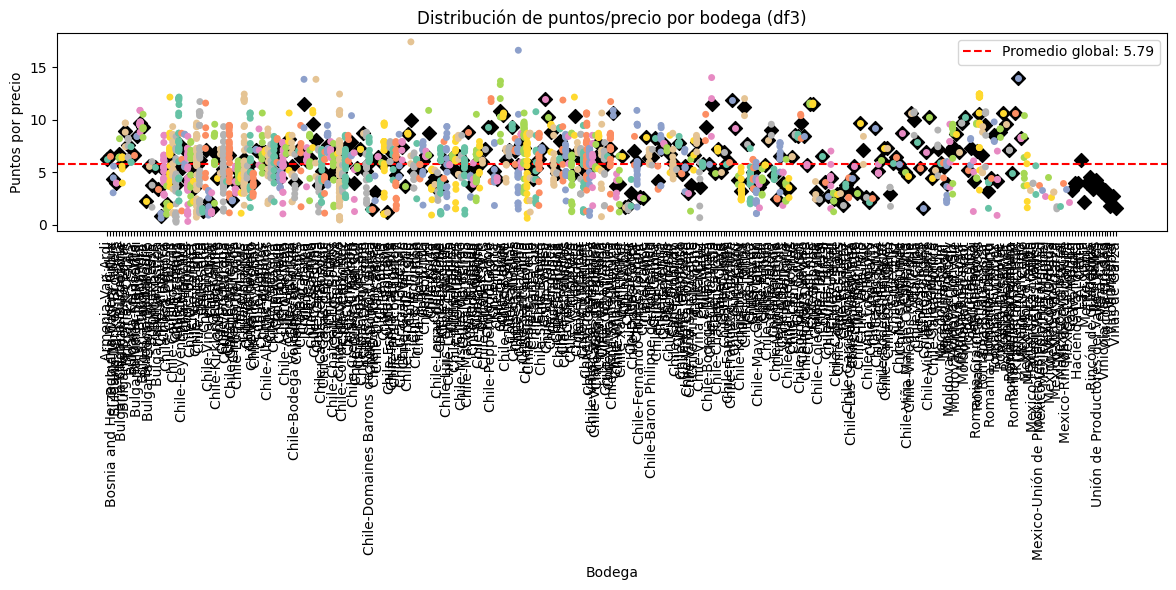

In [229]:
# Dibujamos el scatter por bodega
plt.figure(figsize=(12, 6))
sns.stripplot(data=df3, x="winery", y="points/price", jitter=True, palette="Set2")

# Línea horizontal con el promedio general
plt.axhline(medias, color="red", linestyle="--", label=f"Promedio global: {medias:.2f}")

# Agregar los puntos promedio por bodega
for _, row in promedios_por_bodega.iterrows():
    plt.scatter(row["winery"], row["points/price"], color="black", marker="D", s=50, label=None)

# Estética
plt.xticks(rotation=90)
plt.xlabel("Bodega")
plt.ylabel("Puntos por precio")
plt.title("Distribución de puntos/precio por bodega (df3)")
plt.legend()
plt.tight_layout()
plt.show()

ESte celda la hice para el top 20 de "winery" dado que graf. todas no ses interpretable

<ipython-input-208-8188a3eab335>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df3_top20, x="winery", y="points/price", jitter=True, palette="Set2")


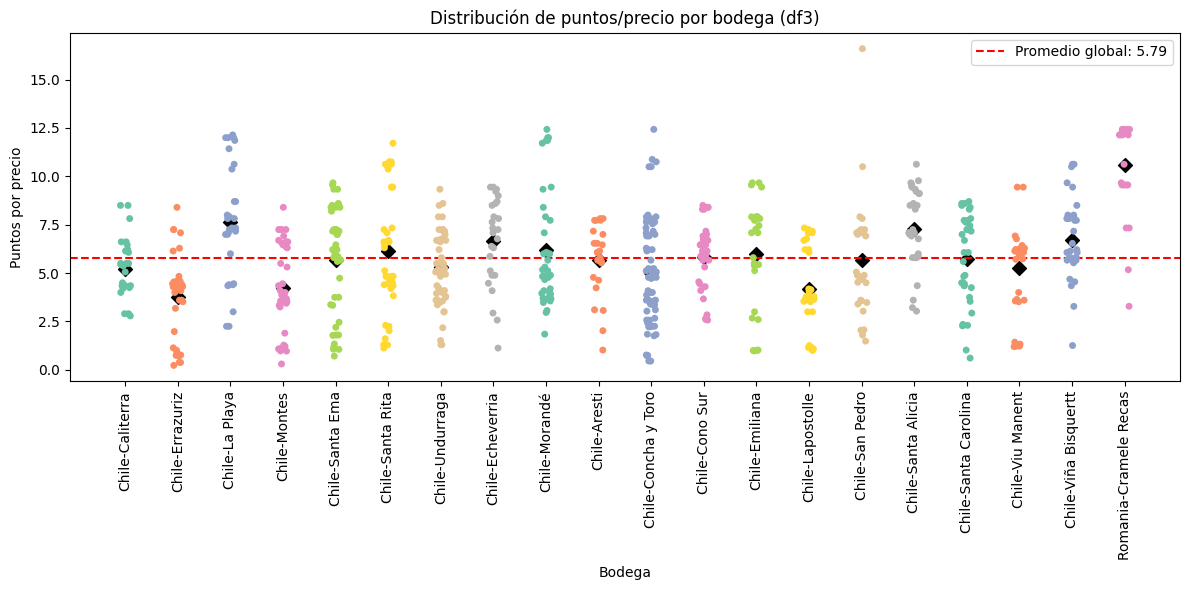

In [208]:
#Para top 20 winery
top_20_wineries = df3["winery"].value_counts().head(20).index
df3_top20 = df3[df3["winery"].isin(top_20_wineries)]

# Promedio general
promedio_general = df3_top20["points/price"].mean()

# Promedio por bodega (agrupado por country y winery
promedios_por_bodega = df3_top20.groupby("winery")["points/price"].mean().reset_index()

# Dibujamos el scatter por bodega
plt.figure(figsize=(12, 6))
sns.stripplot(data=df3_top20, x="winery", y="points/price", jitter=True, palette="Set2")

# Línea horizontal con el promedio general
plt.axhline(medias, color="red", linestyle="--", label=f"Promedio global: {medias:.2f}")

# Agregar los puntos promedio x bodega
for _, row in promedios_por_bodega.iterrows():
    plt.scatter(row["winery"], row["points/price"], color="black", marker="D", s=50, label=None)
plt.xticks(rotation=90)
plt.xlabel("Bodega")
plt.ylabel("Puntos por precio")
plt.title("Distribución de puntos/precio por bodega (df3)")
plt.legend()
plt.tight_layout()
plt.show()

#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

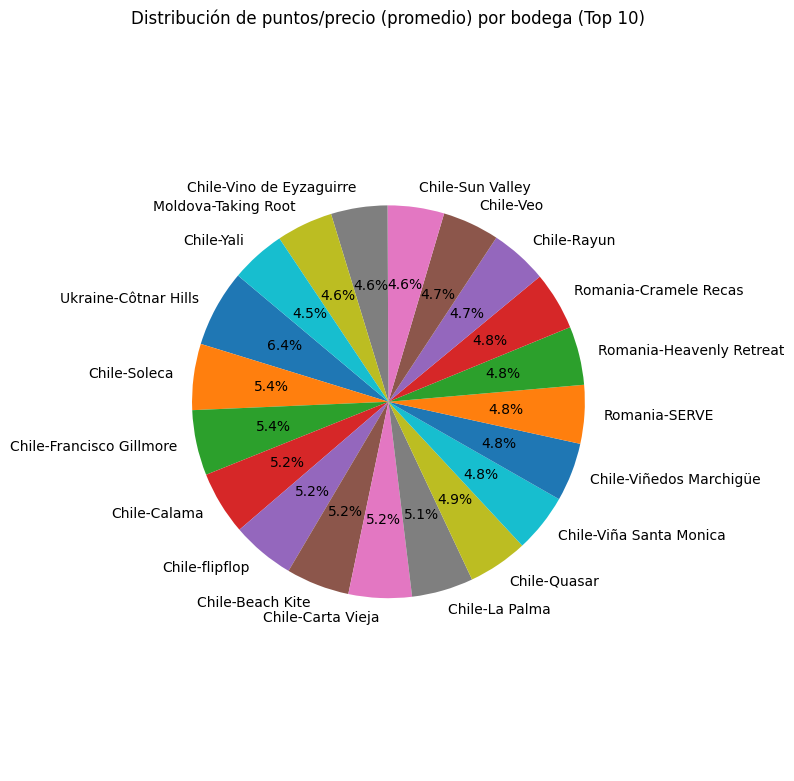

In [230]:
# TU CODIGO
promedios_bodega = df3.groupby("winery")["points/price"].mean()

#Top 20 bodegas por promedio más alto
top_bodegas = promedios_bodega.sort_values(ascending=False).head(20)

#Gráfico pastel
plt.figure(figsize=(8, 8))
plt.pie(top_bodegas, labels=top_bodegas.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de puntos/precio (promedio) por bodega (Top 10)")
plt.axis('equal')  # Para que el círculo quede bien redondo
plt.tight_layout()
plt.show()

Vemos que queda debajo de la media y debajo del top 20 de paices en uanto a la relación puntos/precio